In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import plotting

In [2]:
#Defining symbols in our portfolio.
tickers = ["TSLA", "BIDU", "NVDA", "AAL", "PYPL", "UBER", "DIS", "DHR", "PANW","FWONK","MCL.CN","FI"] 

In [3]:
portfolio_creation_date = "2023-11-07"
portfolio_rebalance_date = "2023-11-07"

In [4]:
#Downloading 10 years of data from yahoo finance.
stock_data = yf.download(tickers, period="10y")

[*********************100%%**********************]  12 of 12 completed


In [30]:
prices = pd.DataFrame(stock_data["Adj Close"].dropna(how="all"))
#prices.set_index("Date", inplace = True)
prices

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Date,,,,,,,,,,,,
2013-11-11,21.937593,151.600006,47.235783,62.127415,26.344999,NaN,0.020,3.681016,13.956667,NaN,9.646667,NaN
2013-11-12,22.173281,150.429993,46.943577,61.609222,26.407499,NaN,0.020,3.688055,13.760000,NaN,9.186667,NaN
2013-11-13,21.975302,152.979996,46.854652,62.700130,26.797501,NaN,0.020,3.788936,13.816667,NaN,9.246667,NaN
2013-11-14,22.305264,158.990005,47.286610,63.654690,26.799999,NaN,0.020,3.805358,14.066667,NaN,9.173333,NaN
2013-11-15,22.522091,162.330002,47.318371,63.636494,27.152500,NaN,0.020,3.793629,15.236667,NaN,9.030000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,11.980000,109.660004,197.869995,85.070000,119.540001,65.230003,0.075,450.049988,243.529999,56.099998,219.960007,47.750000
2023-11-06,11.660000,108.400002,195.520004,84.019997,119.639999,64.980003,0.075,457.510010,237.000000,54.619999,219.270004,48.139999
2023-11-07,11.750000,108.010002,198.250000,84.589996,119.209999,64.199997,0.075,459.549988,242.080002,54.630001,222.179993,49.919998


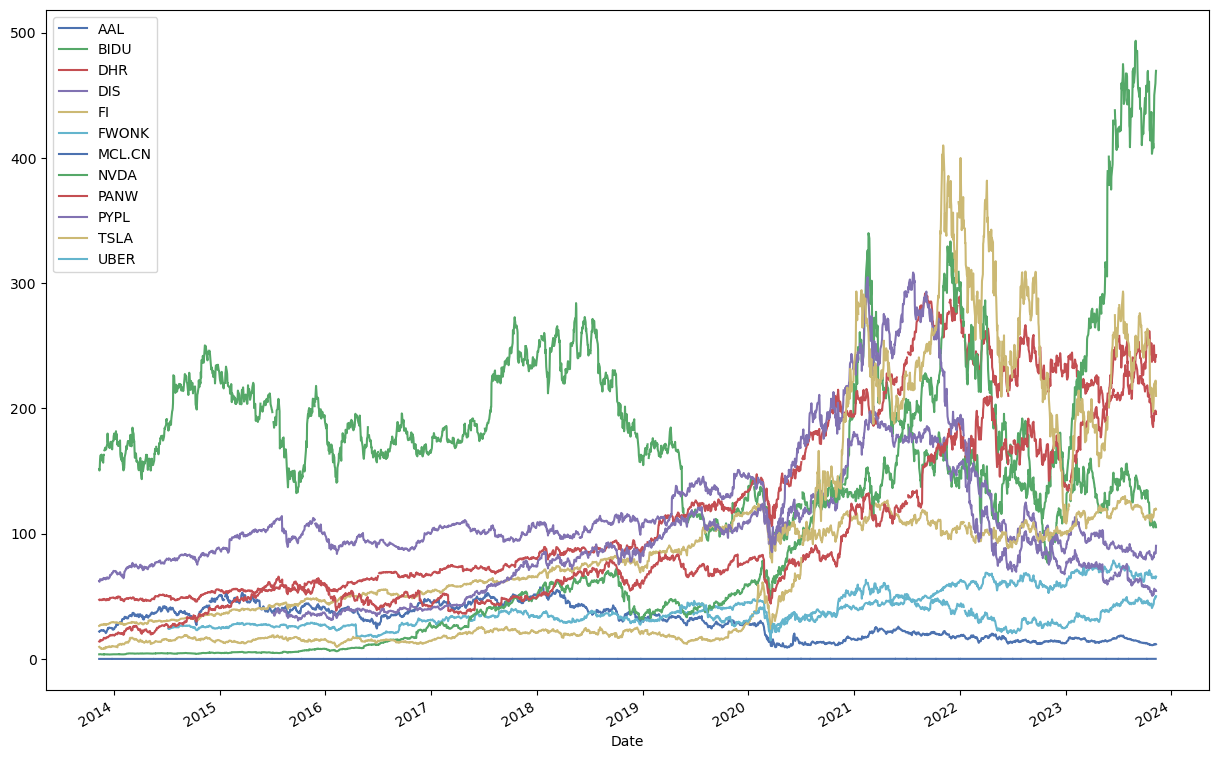

In [6]:
prices[prices.index >= "2013-01-01"].plot(figsize=(15,10));

In [7]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
AAL,0.250225,0.057084,0.025579,0.060224,0.043080,0.053305,-0.010132,0.067434,0.047139,0.055546,0.070917,0.136927
BIDU,0.057084,0.195296,0.029808,0.036764,0.034256,0.039788,0.006037,0.074739,0.049488,0.067551,0.082224,0.114978
DHR,0.025579,0.029808,0.051625,0.023248,0.027598,0.025617,0.004997,0.046178,0.031602,0.043059,0.037866,0.049612
DIS,0.060224,0.036764,0.023248,0.072505,0.035127,0.039726,0.005935,0.046361,0.036521,0.047901,0.044287,0.089686
FI,0.043080,0.034256,0.027598,0.035127,0.061495,0.036867,-0.004709,0.047721,0.032017,0.051712,0.043421,0.075074
FWONK,0.053305,0.039788,0.025617,0.039726,0.036867,0.118727,-0.001090,0.054632,0.040068,0.045210,0.051190,0.086779
MCL.CN,-0.010132,0.006037,0.004997,0.005935,-0.004709,-0.001090,3.540795,0.000165,-0.015125,0.005864,0.009584,0.028691
NVDA,0.067434,0.074739,0.046178,0.046361,0.047721,0.054632,0.000165,0.210872,0.071733,0.095837,0.105863,0.136555
PANW,0.047139,0.049488,0.031602,0.036521,0.032017,0.040068,-0.015125,0.071733,0.147449,0.062933,0.075675,0.090556
PYPL,0.055546,0.067551,0.043059,0.047901,0.051712,0.045210,0.005864,0.095837,0.062933,0.146415,0.088931,0.117964


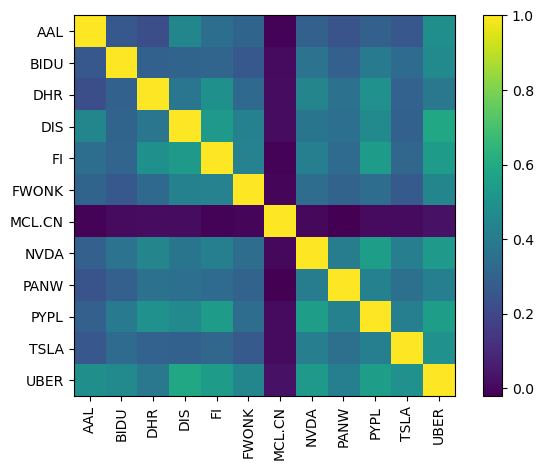

In [8]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

In [9]:
mu = expected_returns.capm_return(prices)
mu

AAL       0.303361
BIDU      0.282987
DHR       0.153298
DIS       0.195521
FI        0.178335
FWONK     0.218315
MCL.CN    1.415149
NVDA      0.338000
PANW      0.246529
PYPL      0.301366
TSLA      0.377689
UBER      0.517800
Name: mkt, dtype: float64

Portfolio Allocation


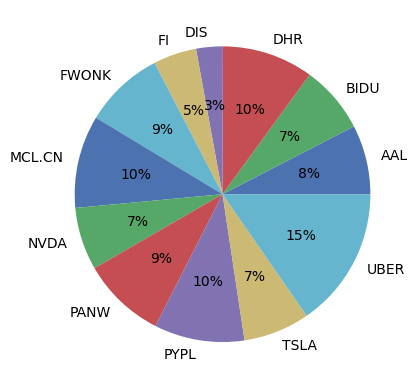

In [10]:
ef = EfficientFrontier(mu,sample_cov)
weights = ef.max_sharpe() #for maximizing the Sharpe ratio #Optimization
cleaned_weights = ef.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

In [11]:
cleaned_weights

OrderedDict([('AAL', 0.07583),
             ('BIDU', 0.0739),
             ('DHR', 0.09983),
             ('DIS', 0.0292),
             ('FI', 0.0473),
             ('FWONK', 0.08742),
             ('MCL.CN', 0.10138),
             ('NVDA', 0.06856),
             ('PANW', 0.09167),
             ('PYPL', 0.09876),
             ('TSLA', 0.07254),
             ('UBER', 0.15362)])

In [12]:
latest_prices = prices.loc[portfolio_creation_date]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)
alloc, leftover = da.lp_portfolio(verbose=True)
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Funds remaining: 197.89
AAL: allocated 0.000, desired 0.076
BIDU: allocated 0.075, desired 0.074
DHR: allocated 0.101, desired 0.100
DIS: allocated 0.031, desired 0.029
FI: allocated 0.049, desired 0.047
FWONK: allocated 0.088, desired 0.087
MCL.CN: allocated 0.168, desired 0.101
NVDA: allocated 0.069, desired 0.069
PANW: allocated 0.092, desired 0.092
PYPL: allocated 0.100, desired 0.099
TSLA: allocated 0.073, desired 0.073
UBER: allocated 0.155, desired 0.154
Allocation has RMSE: 0.029
Discrete allocation performed with $197.89 leftover


C:\Users\DOUGHJ-WS1\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'BIDU': 69,
 'DHR': 51,
 'DIS': 36,
 'FI': 41,
 'FWONK': 137,
 'MCL.CN': 222910,
 'NVDA': 15,
 'PANW': 38,
 'PYPL': 182,
 'TSLA': 33,
 'UBER': 309}

In [13]:
ef.portfolio_performance(verbose=True);

Expected annual return: 41.8%
Annual volatility: 32.2%
Sharpe Ratio: 1.24


In [14]:
alloc_df = pd.DataFrame()
alloc_df = alloc_df.append(alloc,ignore_index=True)
alloc_df

C:\Users\DOUGHJ-WS1\AppData\Local\Temp\ipykernel_12624\1450910952.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alloc_df = alloc_df.append(alloc,ignore_index=True)


,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
0,69,51,36,41,137,222910,15,38,182,33,309


In [15]:
current_values = prices.loc[portfolio_rebalance_date] * alloc_df
current_values

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
0,NaN,7452.690147,10110.75,3045.239868,4887.609962,8795.399582,16718.250664,6893.249817,9199.04007,9942.660194,7331.939758,15425.279434


In [16]:
current_values_sum = current_values.sum(axis=1, numeric_only=True)
current_values_sum

0    99802.109498
dtype: float64

In [17]:
total_value = current_values_sum + leftover
total_value

0    99999.999998
dtype: float64

In [21]:
equal_weights = {'AAL': 0.08333,
             'BIDU': 0.08333,
             'DHR': 0.08333,
             'DIS': 0.08333,
             'FI': 0.08333,
             'FWONK': 0.08333,
             'MCL.CN': 0.08333,
             'NVDA': 0.08333,
             'PANW': 0.08333,
             'PYPL': 0.08333,
             'TSLA': 0.08333,
             'UBER': 0.08333}

print(equal_weights)

{'AAL': 0.08333, 'BIDU': 0.08333, 'DHR': 0.08333, 'DIS': 0.08333, 'FI': 0.08333, 'FWONK': 0.08333, 'MCL.CN': 0.08333, 'NVDA': 0.08333, 'PANW': 0.08333, 'PYPL': 0.08333, 'TSLA': 0.08333, 'UBER': 0.08333}


In [32]:
equal_weights_df = pd.DataFrame()
equal_weights_df = equal_weights_df.append(equal_weights,ignore_index=True)
equal_weights_df

C:\Users\DOUGHJ-WS1\AppData\Local\Temp\ipykernel_12624\934648606.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  equal_weights_df = equal_weights_df.append(equal_weights,ignore_index=True)


,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
0,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333


In [22]:
latest_prices = prices.loc[portfolio_creation_date]  # prices as of the day you are allocating
da_ew = DiscreteAllocation(equal_weights, latest_prices, total_portfolio_value=100000)
alloc_ew, leftover_ew = da_ew.lp_portfolio(verbose=True)
print(f"Discrete allocation performed with ${leftover_ew:.2f} leftover")
alloc_ew

Funds remaining: 328.11
AAL: allocated 0.000, desired 0.083
BIDU: allocated 0.091, desired 0.083
DHR: allocated 0.091, desired 0.083
DIS: allocated 0.091, desired 0.083
FI: allocated 0.091, desired 0.083
FWONK: allocated 0.091, desired 0.083
MCL.CN: allocated 0.090, desired 0.083
NVDA: allocated 0.092, desired 0.083
PANW: allocated 0.090, desired 0.083
PYPL: allocated 0.090, desired 0.083
TSLA: allocated 0.091, desired 0.083
UBER: allocated 0.091, desired 0.083
Allocation has RMSE: 0.025
Discrete allocation performed with $328.11 leftover


C:\Users\DOUGHJ-WS1\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'BIDU': 84,
 'DHR': 46,
 'DIS': 107,
 'FI': 76,
 'FWONK': 141,
 'MCL.CN': 120126,
 'NVDA': 20,
 'PANW': 37,
 'PYPL': 165,
 'TSLA': 41,
 'UBER': 181}

In [24]:
alloc_ew_df = pd.DataFrame()
alloc_ew_df = alloc_ew_df.append(alloc_ew,ignore_index=True)
alloc_ew_df

C:\Users\DOUGHJ-WS1\AppData\Local\Temp\ipykernel_12624\1078969030.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alloc_ew_df = alloc_ew_df.append(alloc_ew,ignore_index=True)


,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
0,84,46,107,76,141,120126,20,37,165,41,181


In [25]:
current_values_ew = prices.loc[portfolio_rebalance_date] * alloc_ew_df
current_values_ew

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
0,NaN,9072.840179,9119.5,9051.129608,9059.95993,9052.19957,9009.450358,9190.999756,8956.960068,9013.950176,9109.3797,9035.519669


In [26]:
current_values_ew_sum = current_values_ew.sum(axis=1, numeric_only=True)
current_values_ew_sum

0    99671.889014
dtype: float64

In [27]:
total_value_ew = current_values_ew_sum + leftover_ew
total_value_ew

0    99999.99999
dtype: float64

In [34]:
combined_returns_ew = prices.pct_change()
combined_returns_ew

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Date,,,,,,,,,,,,
2013-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-12,0.010744,-0.007718,-0.006186,-0.008341,0.002372,NaN,0.0,0.001912,-0.014091,NaN,-0.047685,NaN
2013-11-13,-0.008929,0.016951,-0.001894,0.017707,0.014769,NaN,0.0,0.027354,0.004118,NaN,0.006531,NaN
2013-11-14,0.015015,0.039286,0.009219,0.015224,0.000093,NaN,0.0,0.004334,0.018094,NaN,-0.007931,NaN
2013-11-15,0.009721,0.021008,0.000672,-0.000286,0.013153,NaN,0.0,-0.003082,0.083175,NaN,-0.015625,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,0.050877,0.024381,0.025339,0.021371,0.014685,-0.007003,0.0,0.034455,-0.027281,0.018888,0.006636,0.027324
2023-11-06,-0.026711,-0.011490,-0.011876,-0.012343,0.000837,-0.003833,0.0,0.016576,-0.026814,-0.026381,-0.003137,0.008168
2023-11-07,0.007719,-0.003598,0.013963,0.006784,-0.003594,-0.012004,0.0,0.004459,0.021435,0.000183,0.013271,0.036975


In [33]:

#portfolio_returns_ew = combined_returns_ew.dot(equal_weights_df)
#portfolio_returns_ew
#cumulative_returns = (1 + portfolio_returns).cumprod()

ValueError: matrices are not aligned